Diwa Prasetyo

https://www.dicoding.com/users/diwa_prasetyo_eksz/academies

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import tensorflow as tf

In [13]:
import matplotlib.pyplot as plt

In [14]:

base_dir = '/content/drive/MyDrive/dataset/MY_data/train'


In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.20) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 1849 images belonging to 10 classes.
Found 462 images belonging to 10 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 17, 128)      

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
#menggunakan callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') and logs.get('val_accuracy')>0.8):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [24]:
history = model.fit(
      train_generator,
      steps_per_epoch=24,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=175,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2, callbacks=[callbacks])

Epoch 1/175
24/24 - 54s - loss: 0.4658 - accuracy: 0.8294 - val_loss: 0.7290 - val_accuracy: 0.7625 - 54s/epoch - 2s/step
Epoch 2/175
24/24 - 36s - loss: 0.4530 - accuracy: 0.8359 - val_loss: 0.7508 - val_accuracy: 0.7563 - 36s/epoch - 1s/step
Epoch 3/175
24/24 - 36s - loss: 0.4757 - accuracy: 0.8203 - val_loss: 0.7346 - val_accuracy: 0.7750 - 36s/epoch - 2s/step
Epoch 4/175
24/24 - 39s - loss: 0.4570 - accuracy: 0.8451 - val_loss: 0.8363 - val_accuracy: 0.7500 - 39s/epoch - 2s/step
Epoch 5/175
24/24 - 36s - loss: 0.5263 - accuracy: 0.8281 - val_loss: 0.8727 - val_accuracy: 0.7375 - 36s/epoch - 1s/step
Epoch 6/175
24/24 - 38s - loss: 0.4986 - accuracy: 0.8307 - val_loss: 0.7333 - val_accuracy: 0.7500 - 38s/epoch - 2s/step
Epoch 7/175
24/24 - 36s - loss: 0.4544 - accuracy: 0.8384 - val_loss: 0.9964 - val_accuracy: 0.7063 - 36s/epoch - 1s/step
Epoch 8/175
24/24 - 38s - loss: 0.5851 - accuracy: 0.7995 - val_loss: 1.0727 - val_accuracy: 0.7188 - 38s/epoch - 2s/step
Epoch 9/175

Akurasi tel

In [22]:
#tf.keras.backend.clear_session()

In [25]:
score = model.evaluate(train_generator)

print('loss: {:.4f}'.format(score[0]))
print('accuracy: {:.4f}'.format(score[1]))

58/58 [==============================] - 31s 536ms/step - loss: 0.4571 - accuracy: 0.8421
loss: 0.4571
accuracy: 0.8421


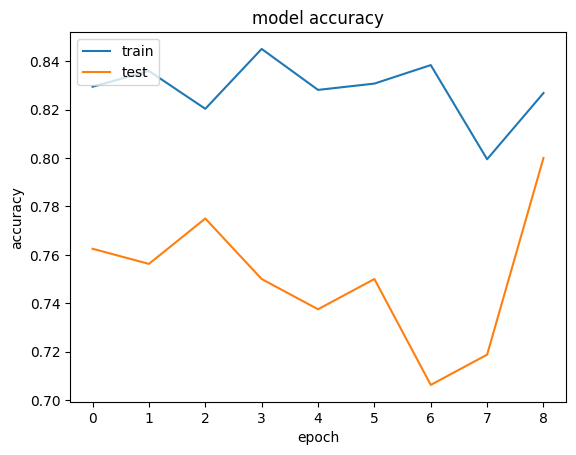

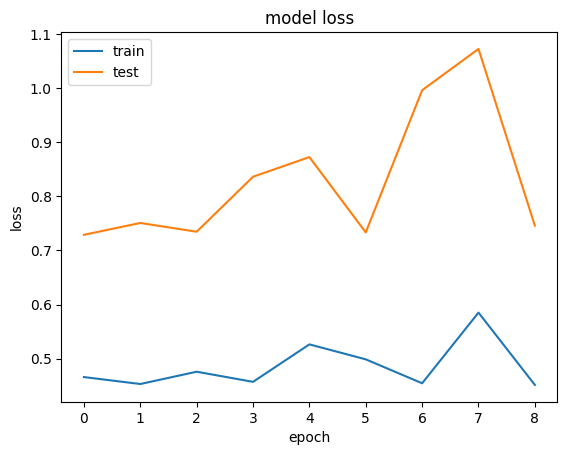

In [26]:
#memvisualisasikan plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [28]:
# Menyimpan model dalam format SavedModel
import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

32121908